# Anamoly Detection 

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reading and concatinating the training data
train_data = pd.DataFrame()
for i in range(1,6):
    temp_df = pd.read_csv('training_'+str(i)+'.csv')
    train_data = pd.concat([train_data,temp_df])

In [ ]:
train_data

,timestamp,kpi_value,anomaly_label
0,2014-04-01 00:00:00,18.622185,0
1,2014-04-01 00:05:00,8.163417,0
2,2014-04-01 00:10:00,13.292383,0
3,2014-04-01 00:15:00,11.667046,0
4,2014-04-01 00:20:00,12.940358,0
...,...,...,...
18045,2014-07-15 16:59:00,13.498000,1
18046,2014-07-15 17:04:00,19.831000,1
18047,2014-07-15 17:09:00,27.165000,1
18048,2014-07-15 17:14:00,12.873000,0


In [ ]:
train_data['anomaly_label'].value_counts()

0    32587
1     1591
Name: anomaly_label, dtype: int64

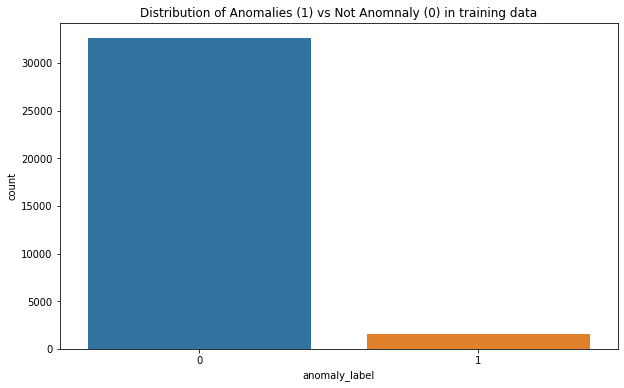

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='anomaly_label',data=train_data)
plt.title('Distribution of Anomalies (1) vs Not Anomnaly (0) in training data');

In [ ]:
# making lags for kpi value column
lags = [1,2,3,4,5] # using 5 previous days data to predict whether today will be anomaly or not
# no of lags can also be a hyper-parameter
for i in lags:
    train_data['value_lag'+str(i)] = train_data['kpi_value'].shift(i)

In [ ]:
train_data

,timestamp,kpi_value,anomaly_label,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,2014-04-01 00:00:00,18.622185,0,NaN,NaN,NaN,NaN,NaN
1,2014-04-01 00:05:00,8.163417,0,18.622185,NaN,NaN,NaN,NaN
2,2014-04-01 00:10:00,13.292383,0,8.163417,18.622185,NaN,NaN,NaN
3,2014-04-01 00:15:00,11.667046,0,13.292383,8.163417,18.622185,NaN,NaN
4,2014-04-01 00:20:00,12.940358,0,11.667046,13.292383,8.163417,18.622185,NaN
...,...,...,...,...,...,...,...,...
18045,2014-07-15 16:59:00,13.498000,1,12.043000,12.170000,12.846000,12.171000,12.124
18046,2014-07-15 17:04:00,19.831000,1,13.498000,12.043000,12.170000,12.846000,12.171
18047,2014-07-15 17:09:00,27.165000,1,19.831000,13.498000,12.043000,12.170000,12.846
18048,2014-07-15 17:14:00,12.873000,0,27.165000,19.831000,13.498000,12.043000,12.170


In [ ]:
y = train_data['anomaly_label']
train_data.drop(columns=['kpi_value','anomaly_label'],axis=1,inplace=True)
train_data['label'] = y

In [ ]:
train_data

,timestamp,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5,label
0,2014-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0
1,2014-04-01 00:05:00,18.622185,NaN,NaN,NaN,NaN,0
2,2014-04-01 00:10:00,8.163417,18.622185,NaN,NaN,NaN,0
3,2014-04-01 00:15:00,13.292383,8.163417,18.622185,NaN,NaN,0
4,2014-04-01 00:20:00,11.667046,13.292383,8.163417,18.622185,NaN,0
...,...,...,...,...,...,...,...
18045,2014-07-15 16:59:00,12.043000,12.170000,12.846000,12.171000,12.124,1
18046,2014-07-15 17:04:00,13.498000,12.043000,12.170000,12.846000,12.171,1
18047,2014-07-15 17:09:00,19.831000,13.498000,12.043000,12.170000,12.846,1
18048,2014-07-15 17:14:00,27.165000,19.831000,13.498000,12.043000,12.170,0


In [ ]:
train_data.dropna(inplace=True)
train_data.reset_index(drop=True,inplace=True)
train_data.isnull().sum()

timestamp     0
value_lag1    0
value_lag2    0
value_lag3    0
value_lag4    0
value_lag5    0
label         0
dtype: int64

# Testing Supervised Classification Algorithm on t1

In [ ]:
train_data.drop('timestamp',1,inplace=True)

In [ ]:
!pip install imblearn==0.0

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
int(len(train_data) * .99)

33831

In [ ]:
# 1. Splitting Data into training and test - 80-20

#train_data['timestamp'] =  pd.to_datetime(train_data['timestamp'])
#train_data['timestamp'] = np.asarray(train_data['timestamp']).astype('float32')
#test_data['timestamp'] =  pd.to_datetime(test_data['timestamp'])
#test_data['timestamp'] = np.asarray(test_data['timestamp']).astype('float32')


train_test_split = int(len(train_data) * .99)

train_set = train_data[:train_test_split]
test_set = train_data[train_test_split:]
train_labels = train_set.pop('label')
test_labels = test_set.pop('label')

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
train_set,train_labels=smk.fit_sample(train_set,train_labels)
 


#train_set = pd.to_datetime(train_set)
#test_set = pd.to_datetime(test_set)
#train_set = np.asarray(train_set).astype('float32')
#test_set= np.asarray(test_set).astype('float32')

In [ ]:
train_set

,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,12.940358,11.667046,13.292383,8.163417,18.622185
1,14.277310,12.940358,11.667046,13.292383,8.163417
2,12.791481,14.277310,12.940358,11.667046,13.292383
3,12.563315,12.791481,14.277310,12.940358,11.667046
4,16.059958,12.563315,12.791481,14.277310,12.940358
...,...,...,...,...,...
65135,0.000000,0.000000,0.000000,0.000000,0.000000
65136,1.143036,1.375262,0.000000,0.000000,0.000000
65137,56.475780,62.148734,56.929336,59.303004,54.237530
65138,73.241361,87.178333,37.198198,51.409644,61.848457


In [ ]:
#scaler = StandardScaler()
#train_set = scaler.fit_transform(train_set) # Only normalize on the train set
#test_set = scaler.transform(test_set)

# clip() ensures all values fall within the range [-5,5]
# useful if any outliers remain after normalizing
#train_set = np.clip(train_set, 0, 1)
#test_set = np.clip(test_set, 0, 1)

In [ ]:
weight_for_non_fraud = 1.0 / train_data['label'].value_counts()[0]
weight_for_fraud = 1.0 / train_data['label'].value_counts()[1]

class_weight = {0: weight_for_non_fraud, 1: weight_for_fraud}

In [ ]:
!pip install tensorflow==2.3.1

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import json
import matplotlib as mpl

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS):
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_set.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid'),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 100
BATCH_SIZE = 512

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                96        
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:

results = model.fit(
    train_set,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(test_set, test_labels),
    class_weight=class_weight)

Epoch 1/100
128/128 [==============================] - 1s 8ms/step - loss: 0.0017 - tp: 26641.0000 - fp: 26951.0000 - tn: 5619.0000 - fn: 5929.0000 - accuracy: 0.4952 - precision: 0.4971 - recall: 0.8180 - auc: 0.4686 - val_loss: 0.1394 - val_tp: 340.0000 - val_fp: 2.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.9942 - val_precision: 0.9942 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 6.4781e-04 - tp: 30610.0000 - fp: 30864.0000 - tn: 1706.0000 - fn: 1960.0000 - accuracy: 0.4961 - precision: 0.4979 - recall: 0.9398 - auc: 0.4481 - val_loss: 0.1105 - val_tp: 340.0000 - val_fp: 2.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.9942 - val_precision: 0.9942 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 4.6358e-04 - tp: 30948.0000 - fp: 31136.0000 - tn: 1434.0000 - fn: 1622.0000 - accuracy: 0.4971 - precision: 0.4985 - r

In [ ]:
predicted = model.predict(test_set)

y_pred = []

for i in predicted.tolist():
  y_pred.append(int(round(i[0])))

In [ ]:
test_set


,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
33831,58.265,52.835,42.6667,61.4870,64.1660
33832,59.476,58.265,52.8350,42.6667,61.4870
33833,64.000,59.476,58.2650,52.8350,42.6667
33834,68.961,64.000,59.4760,58.2650,52.8350
33835,50.000,68.961,64.0000,59.4760,58.2650
...,...,...,...,...,...
34168,12.043,12.170,12.8460,12.1710,12.1240
34169,13.498,12.043,12.1700,12.8460,12.1710
34170,19.831,13.498,12.0430,12.1700,12.8460
34171,27.165,19.831,13.4980,12.0430,12.1700


In [ ]:
print(y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
cm = confusion_matrix(test_labels, y_pred)
print(cm)

[[  0   2]
 [  0 340]]


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
                
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 3)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

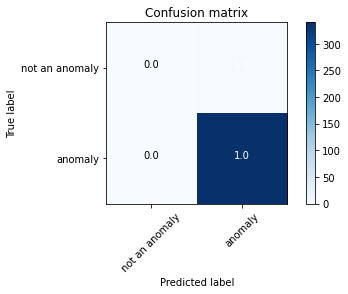

In [ ]:
classes = ['not an anomaly', 'anomaly']
plot_confusion_matrix(cm, classes, normalize=True)

In [ ]:
f1_score(y_pred,test_labels)

0.9970674486803519

In [ ]:

t2 = pd.read_csv('dataset_1.csv')
t22 = pd.read_csv('dataset_1.csv')
t2


,timestamp,kpi_value
0,04/12/2018 00:00:00,465048
1,04/12/2018 00:15:00,461885
2,04/12/2018 00:30:00,455144
3,04/12/2018 00:45:00,456757
4,04/12/2018 01:00:00,458557
...,...,...
2848,05/11/2018 16:00:00,536863
2849,05/11/2018 16:15:00,537542
2850,05/11/2018 16:30:00,541745
2851,05/11/2018 16:45:00,540479


In [ ]:
# making lags for kpi value column
lags = [1,2,3,4,5] # using 5 previous days data to predict whether today will be anomaly or not
# no of lags can also be a hyper-parameter
for i in lags:
    t2['value_lag'+str(i)] = t2['kpi_value'].shift(i)

In [ ]:
t2

,timestamp,kpi_value,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,04/12/2018 00:00:00,465048,NaN,NaN,NaN,NaN,NaN
1,04/12/2018 00:15:00,461885,465048.0,NaN,NaN,NaN,NaN
2,04/12/2018 00:30:00,455144,461885.0,465048.0,NaN,NaN,NaN
3,04/12/2018 00:45:00,456757,455144.0,461885.0,465048.0,NaN,NaN
4,04/12/2018 01:00:00,458557,456757.0,455144.0,461885.0,465048.0,NaN
...,...,...,...,...,...,...,...
2848,05/11/2018 16:00:00,536863,538894.0,537710.0,531114.0,536093.0,535303.0
2849,05/11/2018 16:15:00,537542,536863.0,538894.0,537710.0,531114.0,536093.0
2850,05/11/2018 16:30:00,541745,537542.0,536863.0,538894.0,537710.0,531114.0
2851,05/11/2018 16:45:00,540479,541745.0,537542.0,536863.0,538894.0,537710.0


In [ ]:
t2.dropna(inplace=True)
t2.reset_index(drop=True,inplace=True)
t2.isnull().sum()


timestamp     0
kpi_value     0
value_lag1    0
value_lag2    0
value_lag3    0
value_lag4    0
value_lag5    0
dtype: int64

In [ ]:
t2

,timestamp,kpi_value,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,04/12/2018 01:15:00,452761,458557.0,456757.0,455144.0,461885.0,465048.0
1,04/12/2018 01:30:00,452286,452761.0,458557.0,456757.0,455144.0,461885.0
2,04/12/2018 01:45:00,455049,452286.0,452761.0,458557.0,456757.0,455144.0
3,04/12/2018 02:00:00,453861,455049.0,452286.0,452761.0,458557.0,456757.0
4,04/12/2018 02:15:00,450344,453861.0,455049.0,452286.0,452761.0,458557.0
...,...,...,...,...,...,...,...
2843,05/11/2018 16:00:00,536863,538894.0,537710.0,531114.0,536093.0,535303.0
2844,05/11/2018 16:15:00,537542,536863.0,538894.0,537710.0,531114.0,536093.0
2845,05/11/2018 16:30:00,541745,537542.0,536863.0,538894.0,537710.0,531114.0
2846,05/11/2018 16:45:00,540479,541745.0,537542.0,536863.0,538894.0,537710.0


In [ ]:
t2=t2.drop('kpi_value',axis=1) 

In [ ]:

t2

,timestamp,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,04/12/2018 01:15:00,458557.0,456757.0,455144.0,461885.0,465048.0
1,04/12/2018 01:30:00,452761.0,458557.0,456757.0,455144.0,461885.0
2,04/12/2018 01:45:00,452286.0,452761.0,458557.0,456757.0,455144.0
3,04/12/2018 02:00:00,455049.0,452286.0,452761.0,458557.0,456757.0
4,04/12/2018 02:15:00,453861.0,455049.0,452286.0,452761.0,458557.0
...,...,...,...,...,...,...
2843,05/11/2018 16:00:00,538894.0,537710.0,531114.0,536093.0,535303.0
2844,05/11/2018 16:15:00,536863.0,538894.0,537710.0,531114.0,536093.0
2845,05/11/2018 16:30:00,537542.0,536863.0,538894.0,537710.0,531114.0
2846,05/11/2018 16:45:00,541745.0,537542.0,536863.0,538894.0,537710.0


In [ ]:
t2.drop('timestamp',axis=1,inplace=True)
#t2['timestamp'] =  pd.to_datetime(t2['timestamp'])
#t2['timestamp'] = np.asarray(t2['timestamp']).astype('float32')

In [ ]:

#t2 = scaler.fit_transform(t2) # Only normalize on the train set
# clip() ensures all values fall within the range [-5,5]
# useful if any outliers remain after normalizing
#t2 = np.clip(t2, 0, 1)


In [ ]:
t2.shape

(2848, 5)

In [ ]:
#t2['timestamp'] =  pd.to_datetime(t2['timestamp'])
#t2['timestamp'] = np.asarray(t2['timestamp']).astype('float32')
predicted = model.predict(t2)

y_pred1 = []

for i in predicted.tolist():
  y_pred1.append(int(round(i[0])))

In [ ]:
type(y_pred1)

list

In [ ]:
solution = pd.DataFrame(data=y_pred1,columns=['Predictions'])

In [ ]:
solution

,Predictions
0,1
1,1
2,1
3,1
4,1
...,...
2843,1
2844,1
2845,1
2846,1


In [ ]:
solution['Predictions'].value_counts()

1    2848
Name: Predictions, dtype: int64

In [ ]:
t2["predicted_label"] = y_pred1

In [ ]:
#t2.to_csv('Hackathon_solution_withoutTimestamp.csv')

In [ ]:
solution.to_csv('dataset_solution_withts_11-11.csv')

In [ ]:
#t2['predicted_label'].value_counts()

In [ ]:
#t22